## Creating Bubble charts with matplotlib

In [7]:
import matplotlib.pyplot as plt
import numpy as np

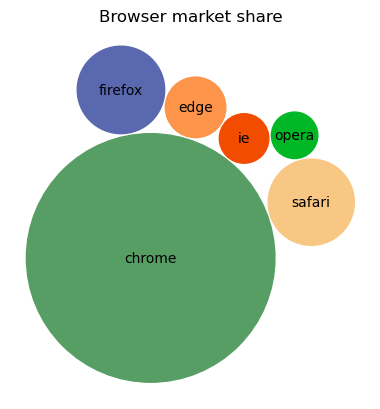

In [10]:
browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

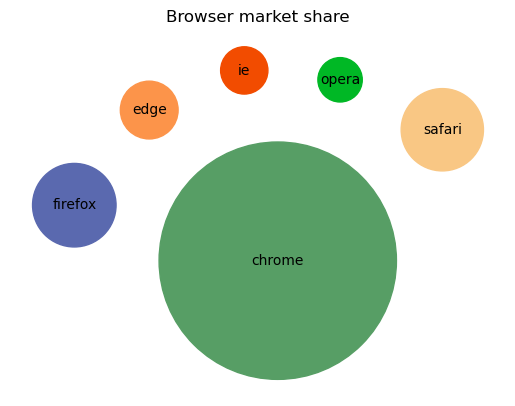

In [13]:
bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=2)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

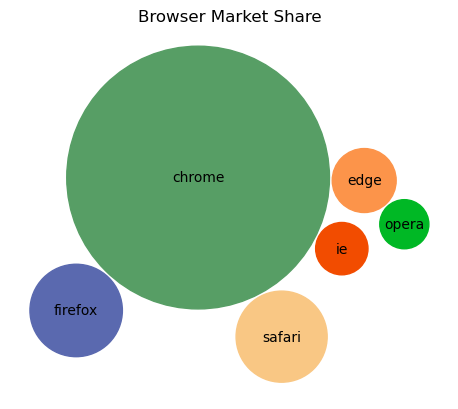

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area

        # Position the bubbles in a horizontal row, touching each other
        self.bubbles[:, 0] = np.cumsum(r * 3 + self.bubble_spacing) - r - self.bubble_spacing / 2
        self.bubbles[:, 1] = 0
        
        self.com = self.center_of_mass()
        self.step_dist = r.min() / 2

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance)

    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    colliding = self.collides_with(new_bubble, rest_bub)
                    dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                    dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                    orth = np.array([dir_vec[1], -dir_vec[0]])
                    new_point1 = self.bubbles[i, :2] + orth * self.step_dist
                    new_point2 = self.bubbles[i, :2] - orth * self.step_dist
                    dist1 = self.center_distance(self.com, np.array([new_point1]))
                    dist2 = self.center_distance(self.com, np.array([new_point2]))
                    new_point = new_point1 if dist1 < dist2 else new_point2
                    new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                    if not self.check_collisions(new_bubble, rest_bub):
                        self.bubbles[i, :] = new_bubble
                        self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

# Browser market share data
browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}

bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser Market Share')

plt.show()


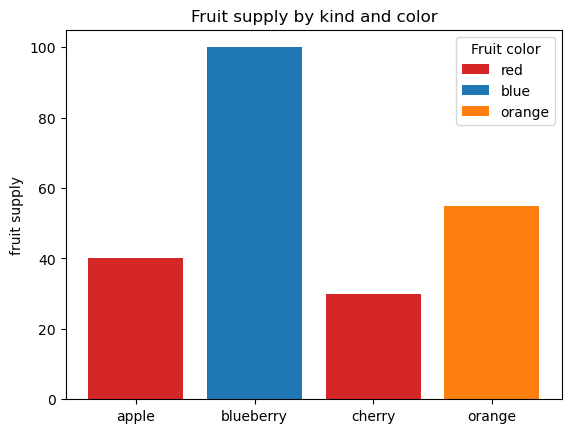

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

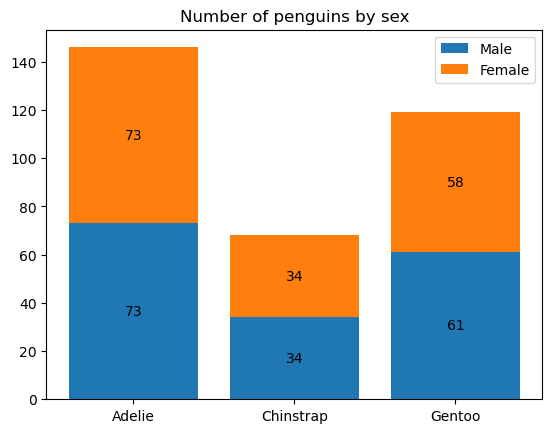

In [24]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

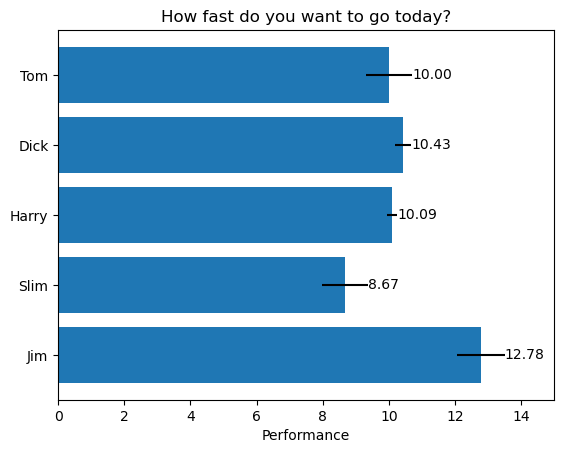

In [25]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

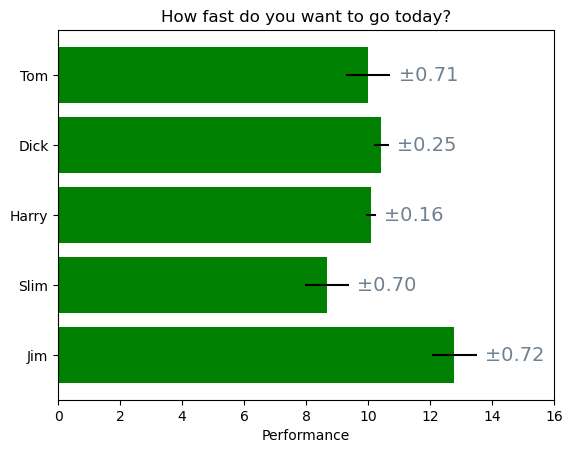

In [30]:
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center', color="green")
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with given captions, custom padding and annotate options
ax.bar_label(hbars, labels=[f'±{e:.2f}' for e in error],
             padding=6, color='slategrey', fontsize=14)
ax.set_xlim(right=16)

plt.show()

[Text(0, 0, '4,000'), Text(0, 0, '2,000'), Text(0, 0, '7,000')]

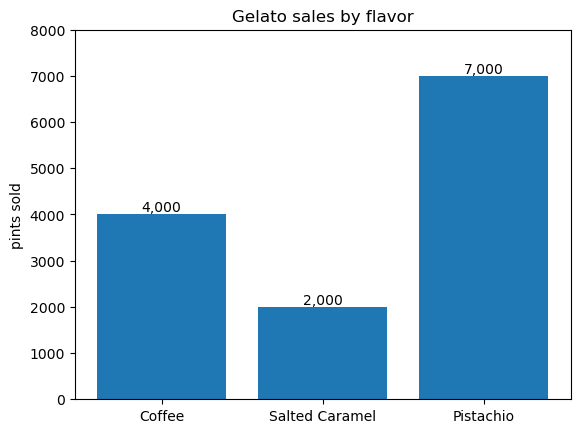

In [31]:
fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

fig, ax = plt.subplots()
bar_container = ax.bar(fruit_names, fruit_counts)
ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
ax.bar_label(bar_container, fmt='{:,.0f}')

[Text(0, 0, '80.5 km/h'), Text(0, 0, '96.6 km/h'), Text(0, 0, '120.8 km/h')]

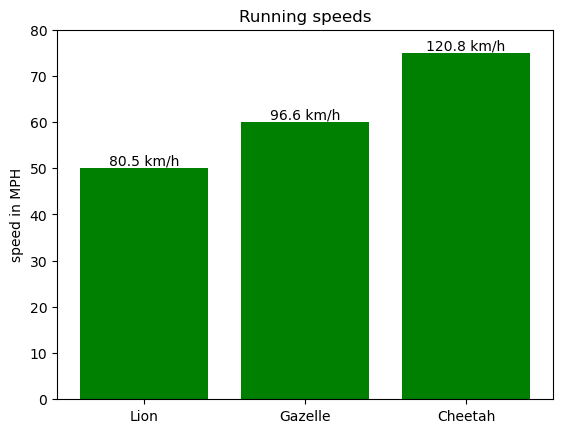

In [34]:
animal_names = ['Lion', 'Gazelle', 'Cheetah']
mph_speed = [50, 60, 75]

fig, ax = plt.subplots()
bar_container = ax.bar(animal_names, mph_speed, color="green")
ax.set(ylabel='speed in MPH', title='Running speeds', ylim=(0, 80))
ax.bar_label(bar_container, fmt=lambda x: f'{x * 1.61:.1f} km/h')